<a href="https://colab.research.google.com/github/kej534923-maker/ECON5200-Applied-Data-Analytics/blob/main/Econ_5200_Assignment_2_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Phase 1: The Robustness Audit


Step 1.1: The "Latency" Trap

In [3]:
import numpy as np
normal_traffic = np.random.randint(20, 50, 980)
spike_traffic = np.random.randint(1000, 5000, 20)
latency_logs = np.concatenate([normal_traffic, spike_traffic])

Step 1.2: Manual MAD vs. SD

In [4]:
import numpy as np

def calculate_mad(data):
    data = np.asarray(data)

    # 1. Median of the data
    median = np.median(data)

    # 2. Absolute deviations from median
    abs_dev = np.abs(data - median)

    # 3. Median of absolute deviations
    mad = np.median(abs_dev)

    return mad

Phase 2: The Probability Audit

Step 2.1: The False Positive Paradox

In [5]:
import numpy as np

def calculate_mad(data):
    # 1. Median of the data
    median = np.median(data)

    # 2. Absolute deviations from median
    abs_dev = np.abs(data - median)

    # 3. Median of deviations
    mad = np.median(abs_dev)

    return mad


# ---- Compare SD vs MAD ----
sd = np.std(latency_logs)
mad = calculate_mad(latency_logs)

print("Standard Deviation:", sd)
print("MAD:", mad)


Standard Deviation: 440.90859231251096
MAD: 8.0


Compare the Standard Deviation (SD) vs. MAD：Standard deviation explodes because it depends on the mean and squares deviations, making it highly sensitive to extreme outliers. MAD remains stable because it uses the median and absolute deviations, which are robust to extreme values.

In [4]:
sens = 0.98
spec = 0.98

print("Scenario A:", bayesian_audit(0.50, sens, spec))
print("Scenario B:", bayesian_audit(0.05, sens, spec))
print("Scenario C:", bayesian_audit(0.001, sens, spec))


Scenario A: 0.98
Scenario B: 0.7205882352941175
Scenario C: 0.04675572519083965


Phase 3: The Bias Audit

Step 3.1: Detecting Sample Ratio Mismatch (SRM)

In [5]:
import numpy as np

# Observed users
observed = np.array([50250, 49750])

# Expected 50/50 split
expected = np.array([50000, 50000])

# Manual chi-square calculation
chi_square = 0
for o, e in zip(observed, expected):
    chi_square += (o - e)**2 / e

print("Chi-Square Statistic:", chi_square)

# Decision rule
if chi_square > 3.84:
    print("SRM DETECTED → Experiment INVALID (engineering bias likely)")
else:
    print("No SRM detected → Experiment allocation OK")


Chi-Square Statistic: 2.5
No SRM detected → Experiment allocation OK


Phase 4: AI Expansion (The Co-Pilot Era)

Task 4.1: The "Memecoin Graveyard" Simulation

Total tokens simulated: 10000
Survivors (Top 1%): 100
Mean Peak Market Cap (ALL tokens): 2,300,339.77
Mean Peak Market Cap (SURVIVORS only): 27,870,331.36
Survivorship Bias Multiplier (Survivors / All): 12.12x


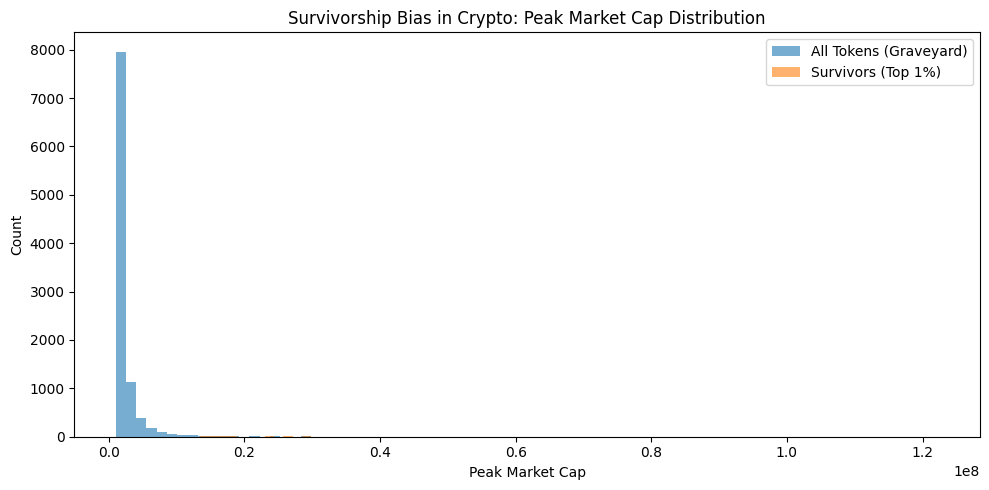

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Survivorship Bias Simulation
# -----------------------------
np.random.seed(42)
N = 10_000

# Pareto (power law): many tiny, few huge
alpha = 1.7  # tail thickness (lower => fatter tail)
raw = np.random.pareto(alpha, size=N) + 1.0  # support starts at 1
peak_market_cap = raw * 1e6                 # scale to "market cap" units

# DataFrames
df_all = pd.DataFrame({
    "token_id": np.arange(N),
    "peak_market_cap": peak_market_cap
})

# Survivors = Top 1%
cutoff = np.quantile(df_all["peak_market_cap"], 0.99)
df_survivors = df_all[df_all["peak_market_cap"] >= cutoff].copy()

# -----------------------------
# Evaluate: Means (bias demo)
# -----------------------------
mean_all = df_all["peak_market_cap"].mean()
mean_survivors = df_survivors["peak_market_cap"].mean()

print(f"Total tokens simulated: {N}")
print(f"Survivors (Top 1%): {len(df_survivors)}")
print(f"Mean Peak Market Cap (ALL tokens): {mean_all:,.2f}")
print(f"Mean Peak Market Cap (SURVIVORS only): {mean_survivors:,.2f}")
print(f"Survivorship Bias Multiplier (Survivors / All): {mean_survivors/mean_all:,.2f}x")

# -----------------------------
# Visualize: Dual Histograms
# -----------------------------
plt.figure(figsize=(10, 5))
plt.hist(df_all["peak_market_cap"], bins=80, alpha=0.6, label="All Tokens (Graveyard)")
plt.hist(df_survivors["peak_market_cap"], bins=80, alpha=0.6, label="Survivors (Top 1%)")
plt.title("Survivorship Bias in Crypto: Peak Market Cap Distribution")
plt.xlabel("Peak Market Cap")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()
